# Prática 2

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**

Considere os dados de fechamento do papel VALE3 a partir de 21/07/2020 no arquivo VALE3.csv.
(fonte dos dados https://br.financas.yahoo.com/quote/VALE3.SA/history?p=VALE3.SA em Acesso em 20/07/2021)


Nesta prática, aplicaremos os conhecimentos adquiridos na Aula 2 a esses dados, a saber:

- Método de Holt

- Método de Holt-Winters

- Previsão 

- Estacionariedade


Carregue as bibliotecas

In [1]:
# Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")


**1. Faça a leitura dos dados a partir do arquivo VALE3.csv disponível no material do curso. Para essa análise, utilizaremos a variável que indica os fechamentos, Close. Quantas observações tem a série original? Visualize a série Close.**

In [2]:
pkgdir = 'dados'

vale = pd.read_csv(f'{pkgdir}/VALE3.csv', index_col=0, parse_dates=True)

vale.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [3]:
len(vale)

246

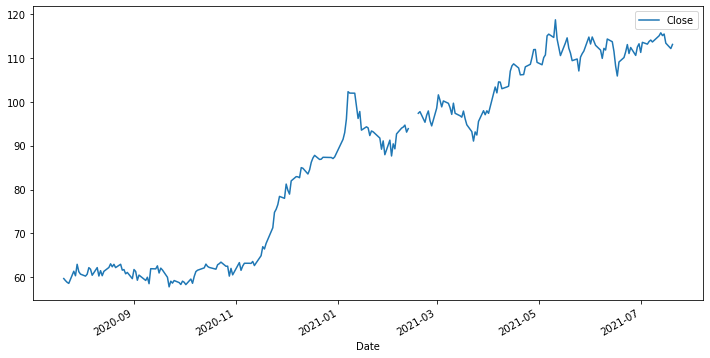

In [4]:
vale[['Close']].plot(figsize=(12,6));

**2. Quais as datas mínima e máxima de observação da série Close? Repita o procedimento feito em aula para preencher os dados faltantes com a função VALE3.fillna(method='ffill', inplace=True). Nesse caso, a frequência usada em pd.date_range deve ser 'B' pois a bolsa de valores não funciona aos fins de semana. O que faz o método ffill de fillna?**

Notebook Holt-HoltWinters, linha 37

In [5]:
vale.index.min()

Timestamp('2020-07-21 00:00:00')

In [6]:
vale.index.max()

Timestamp('2021-07-20 00:00:00')

In [7]:
# freq=B, business day frequency

idx = pd.date_range(start='2020-07-21', end='2021-07-20', freq='B')
idx

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', length=261, freq='B')

In [8]:
vale = vale.reindex(idx)
vale.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [9]:
# fill' stands for 'forward fill' and will propagate last valid observation forward
vale.fillna(method='ffill',inplace=True)
vale.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [10]:
vale.loc['2020-09-01':'2020-09-07']

,Open,High,Low,Close,Adj Close,Volume
2020-09-01,60.290001,61.790001,60.200001,61.759998,55.627811,24197700.0
2020-09-02,61.900002,62.340000,60.320000,61.320000,55.231503,21797200.0
2020-09-03,60.000000,60.549999,58.849998,59.320000,53.430080,36117400.0
2020-09-04,59.709999,60.500000,58.700001,60.490002,54.483913,26636700.0
2020-09-07,59.709999,60.500000,58.700001,60.490002,54.483913,26636700.0


**3. Qual o novo número de observações da série Close após o procedimento em 2.?**

In [11]:
len(vale)

261

**4. Vamos aplicar os métodos de Holt e Holt-Winters para esses dados. Faça a leitura das bibliotecas necessárias e crie a série Holt na base de dados. Atribua a ela os valores ajustados pelo Método de Holt. Lembre-se que a série fica deslocada e corrija com a função shift(-1).**

In [12]:
# Método de Holt 

from statsmodels.tsa.api import ExponentialSmoothing

modelo =  ExponentialSmoothing(vale['Close'], trend='add');

ajustado = modelo.fit();

vale['Holt'] = ajustado.fittedvalues.shift(-1);

vale.head()


,Open,High,Low,Close,Adj Close,Volume,Holt
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896926
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516450
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127476
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862459
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304509


**5. Visualize as séries Close e Holt. O método apresenta um bom ajuste?**

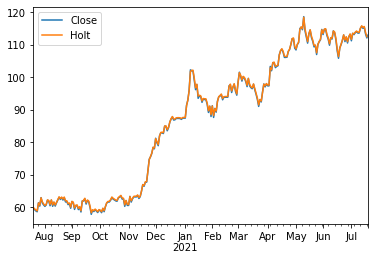

In [13]:
vale[['Close','Holt']].plot();

O método de Holt apresenta um bom ajuste.<br>
Ele não será bom para fazer previsões.

**6. Faz sentido ajustar o método de Holt-Winters? Qual seria o período da sazonalidade? 5 dias pode fazer sentido? Aplique os métodos de Holt-Winters com sazonalidade aditiva e multiplicativa e visualize os resultados.**

In [14]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade aditiva

modelo =  ExponentialSmoothing(vale['Close'],trend='add',seasonal='add',seasonal_periods=5);

ajustado = modelo.fit();

vale['Holt-Winters-adit-5'] = ajustado.fittedvalues;

vale.head()

,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-5
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896926,59.616670
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516450,59.977293
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127476,59.401907
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862459,59.001609
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304509,59.119881


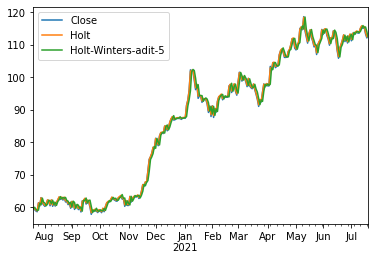

In [15]:
vale[['Close','Holt', 'Holt-Winters-adit-5']].plot();

In [16]:
# Ajuste do modelo pelo Método de Holt-Winters com sazonalidade multiplicativa

modelo =  ExponentialSmoothing(vale['Close'],trend='add',seasonal='mul',seasonal_periods=5);

ajustado = modelo.fit();

vale['Holt-Winters-mul-5'] = ajustado.fittedvalues;

vale.head()

,Open,High,Low,Close,Adj Close,Volume,Holt,Holt-Winters-adit-5,Holt-Winters-mul-5
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0,59.896926,59.616670,59.619048
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0,59.516450,59.977293,59.947522
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0,59.127476,59.401907,59.454801
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0,58.862459,59.001609,59.028060
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0,61.304509,59.119881,59.028410


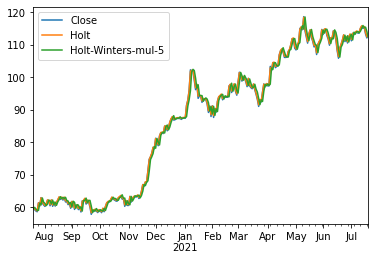

In [17]:
vale[['Close','Holt', 'Holt-Winters-mul-5']].plot();

**7. Olhe as previsões para as últimas 40 observações**

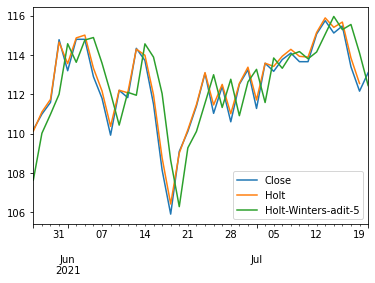

In [18]:
## Olhando somente para as últimas 40 observações

vale[['Close','Holt','Holt-Winters-adit-5']].iloc[-40:].plot();

Holt-Winters tem uma defasagem de 1 dia.<br>
Holt também tem mas foi corrigido com o shift(-1) na predição.

**8. Como ficam as previsões? Use 240 observações para treino e 21 para teste.**

In [19]:
dados_treino = vale.iloc[:240] # Dados de treinamento até observação 240, sem incluí-la
dados_teste = vale.iloc[240:] # Dados de teste a partir da observação 240

In [20]:
len(dados_treino)

240

In [21]:
len(dados_teste)

21

In [22]:
# Ajuste do modelo
ajustado_H = ExponentialSmoothing(dados_treino['Close'],trend='add').fit()   
predito_H = ajustado_H.forecast(21).rename('Previsão Holt')

ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='add',seasonal_periods=5).fit()
predito_HW = ajustado_HW.forecast(21).rename('Previsão Holt-Winters')

predito_H.index = vale.index[240:]
predito_HW.index = vale.index[240:]

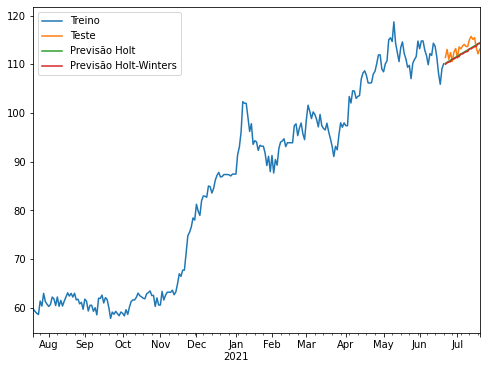

In [23]:
dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste', figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

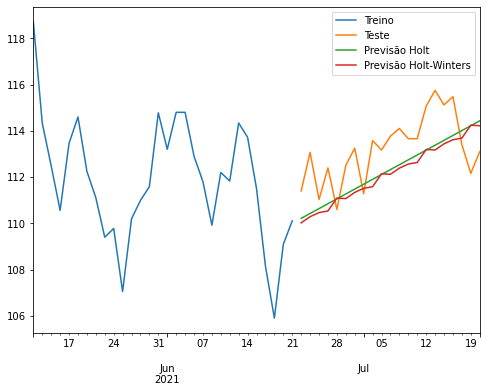

In [24]:
dados_treino['Close'].iloc[210:].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste', figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

**9. É possível melhorar as previsões com o método de Holt-Winters com sazonalidade e/ou tendência multiplicativos?**

In [25]:
# Ajuste do modelo
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='mul',seasonal_periods=5).fit()
predito_HW = ajustado_HW.forecast(21).rename('Previsão Holt-Winters')
predito_HW.index = vale.index[240:]

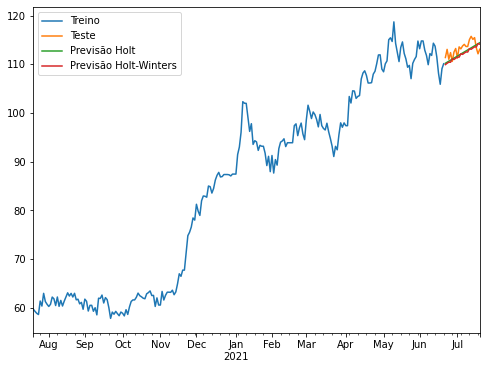

In [26]:
dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste', figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

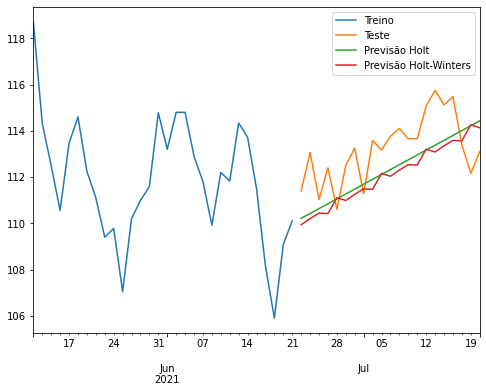

In [27]:
dados_treino['Close'].iloc[210:].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste', figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

In [28]:
# Ajuste do modelo
ajustado_HW = ExponentialSmoothing(dados_treino['Close'],trend='add',seasonal='mul',seasonal_periods=7).fit()
predito_HW = ajustado_HW.forecast(21).rename('Previsão Holt-Winters')
predito_HW.index = vale.index[240:]

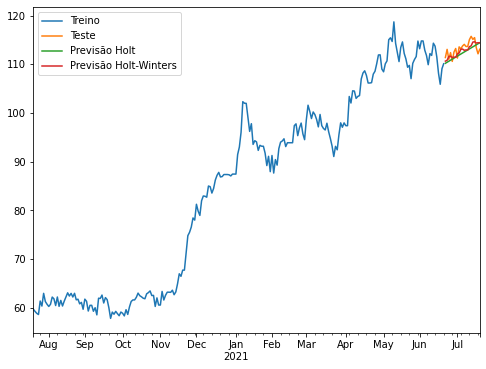

In [29]:
dados_treino['Close'].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste', figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

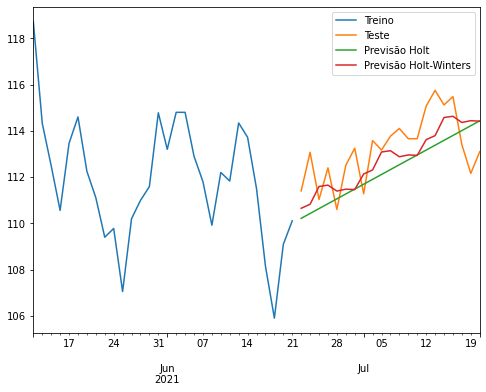

In [30]:
dados_treino['Close'].iloc[210:].plot(legend=True,label='Treino')
dados_teste['Close'].plot(legend=True,label='Teste', figsize=(8,6))
predito_H.plot(legend=True,label='Previsão Holt')
predito_HW.plot(legend=True,label='Previsão Holt-Winters');

**10. Utilize os métodos de Holt e Holt-Winters e compare os erros quadráticos médios e erros absolutos médios. (Depois você pode repetir para os dados de COVID-19).**

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
mean_squared_error(dados_teste['Close'],predito_HW)

1.4972170217929015

In [33]:
mean_absolute_error(dados_teste['Close'], predito_HW)

1.0842228563662606

In [34]:
mean_squared_error(dados_teste['Close'],predito_H)

2.219605828860823

In [35]:
mean_absolute_error(dados_teste['Close'], predito_H)

1.357380409625077

**11. Crie séries da média móvel simples e desvio padrão móvel com janelas de 5 dias. A série parece estacionária?**

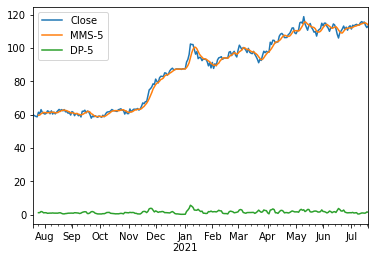

In [36]:
# Verificando a média e desvio-padrão móvel com janela de 5 dias

vale['MMS-5'] = vale['Close'].rolling(window=5).mean()
vale['DP-5'] = vale['Close'].rolling(window=5).std()

vale[['Close','MMS-5','DP-5']].plot();

A série não parece estacionária.

**12. A série das primeiras diferenças parece estacionária?.**

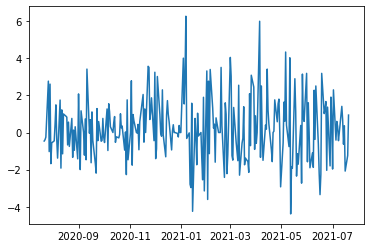

In [37]:
# Primeiras diferenças
y = np.diff(vale['Close'])
x = vale.iloc[1:].index

plt.plot(x,y);

**13. Considere boxplots semanais para a série original. Ela parece estacionária?**

Simplesmente pegando o mês, para julho haverão dados de 2 anos

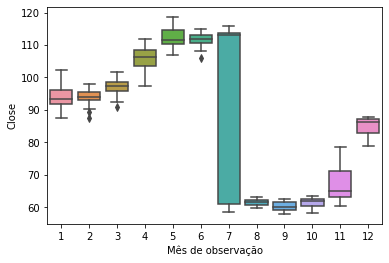

In [38]:
import seaborn as sns

vale['Mês de observação'] = vale.index.month

sns.boxplot(x=vale['Mês de observação'], y=vale['Close']);

Mês 0=jul/2020 e assim por diante até Mês 12=jul/2021

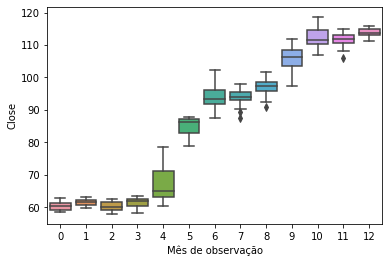

In [39]:
vale['Mês de observação'] = (vale.index.month + (vale.index.year - vale.index.min().year)*12) - vale.index.min().month 

sns.boxplot(x=vale['Mês de observação'], y=vale['Close']);

**14. Utilize o Teste de Dickey-Fuller aumentado. Que evidências ele dá sobre a estacionariedade da série e da primeira diferença?**

In [40]:
# fonte: https://machinelearningmastery.com/time-series-data-stationary-python/
from statsmodels.tsa.stattools import adfuller

result = adfuller(vale['Close'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.758537
p-value: 0.830999
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


p>0.05 não rejeita Ho

Há evidências de que a série não seja estacionária!

In [41]:
result = adfuller(np.diff(vale['Close']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.876273
p-value: 0.000039
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


p<0.05 rejeita Ho

Há evidências de que a série das primeiras diferenças seja estacionária!